--- Current Loss Calculations ---
Average Waste Percentage: 13.78%
Tubes Wasted Per Batch: 689 tubes
Material Loss Per Batch: €34.45
Labor Loss Per Batch: €47.77
Total Loss Per Batch: €82.22

Total Loss Per Week (assuming 2 batches/week): €164.44

Total Loss Per Quarter: €2137.74

Total Loss Per Annum: €8550.95



C:\Users\willi\AppData\Local\Temp\ipykernel_11352\3641134924.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tube Size (mm)', y='Waste Percentage', data=df_waste, palette='viridis')


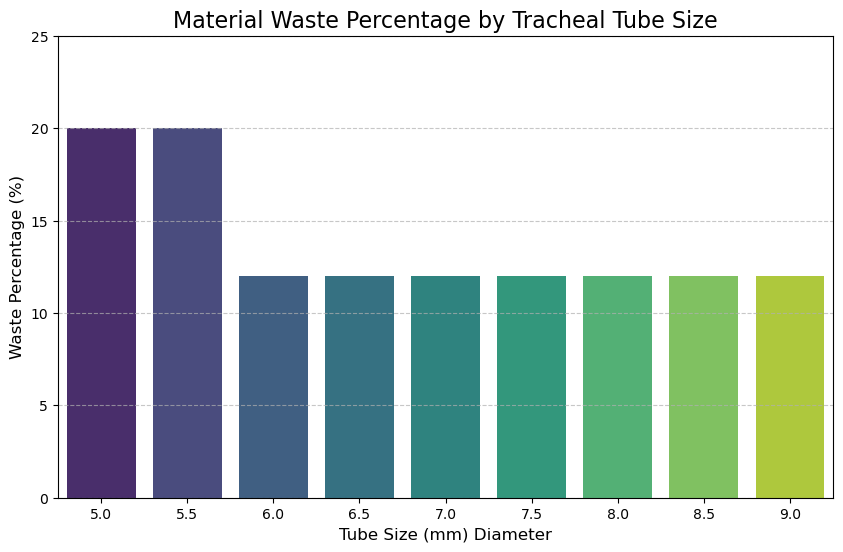

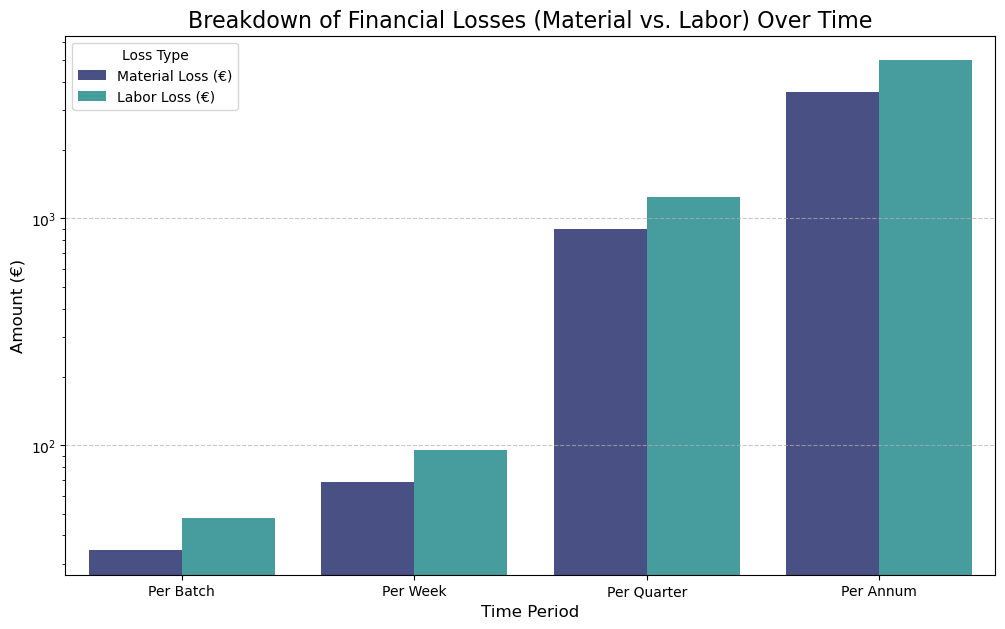

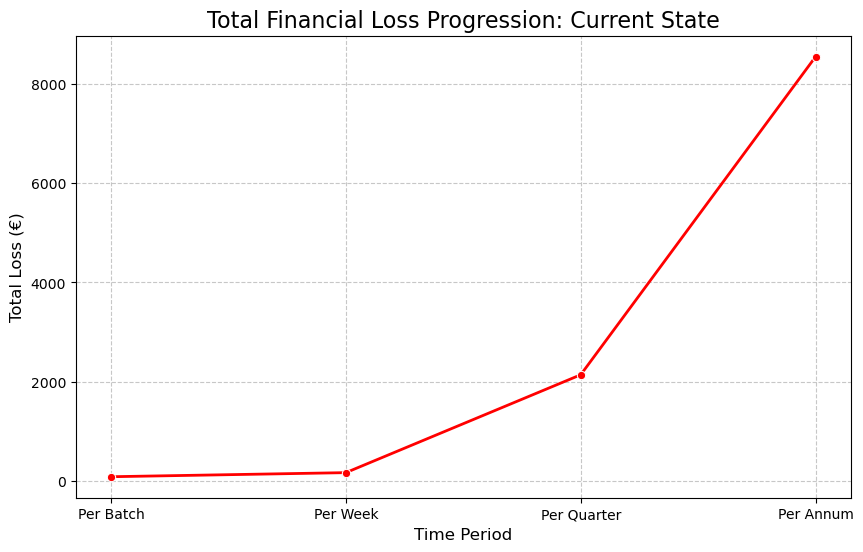


--- Potential Gains from Waste Reduction Scenarios ---
   Reduction (%)  Material Gain (€)  Labor Gain (€)  Total Gain (€)
0             25              895.7         1242.04         2137.74
1             50             1791.4         2484.07         4275.47
2             75             2687.1         3726.11         6413.21


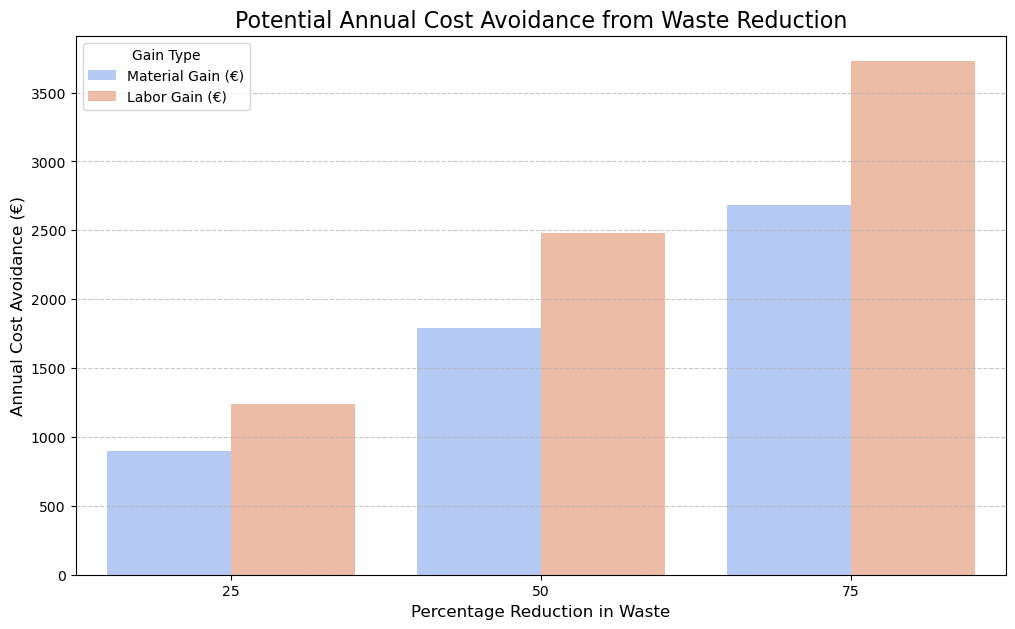

C:\Users\willi\AppData\Local\Temp\ipykernel_11352\3641134924.py:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='Annual Loss (€)', data=df_annual_comparison, palette='magma')


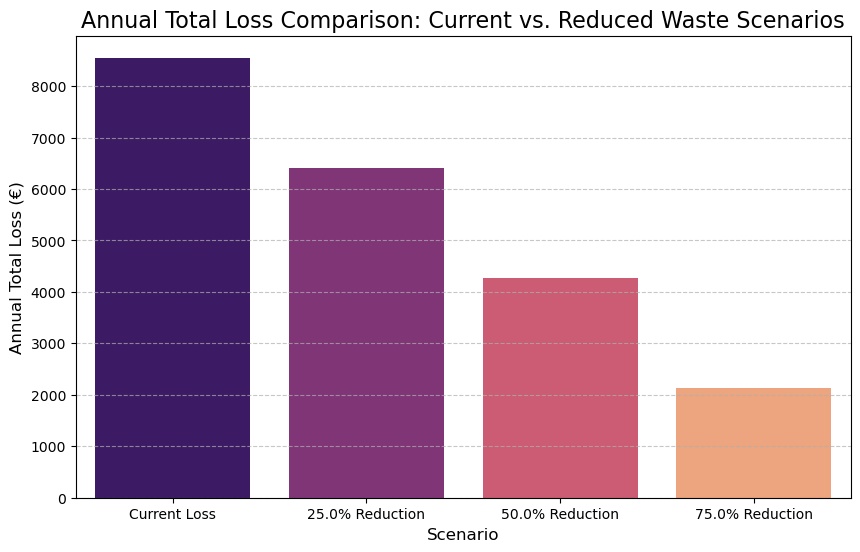

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Data Definition ---
tube_waste_data = {
    'Tube Size (mm)': [5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9],
    'Waste Percentage': [20, 20, 12, 12, 12, 12, 12, 12, 12]
}
df_waste = pd.DataFrame(tube_waste_data)

# --- Calculation Parameters ---
batch_size = 5000
cost_per_uncut_tube = 0.05 # Euro
operator_tubes_per_shift = 1500
operator_shift_hours = 8
labor_cost_per_hour = 13.00 # Euro (Updated)

# --- Derived Parameters ---
average_waste_percentage = df_waste['Waste Percentage'].mean() # Simple average for visualization
# For calculation, we used a weighted average based on even distribution assumption:
# (2*20 + 7*12) / 9 = 13.78
average_waste_percentage_calc = 13.78

tubes_processed_per_hour = operator_tubes_per_shift / operator_shift_hours
hours_per_batch = batch_size / tubes_processed_per_hour

# Assume 2 full batches processed per week for total output calculation
total_batches_per_week = 2

# --- Losses Calculation ---
# Per Batch
tubes_wasted_per_batch = batch_size * (average_waste_percentage_calc / 100)
material_loss_per_batch = tubes_wasted_per_batch * cost_per_uncut_tube
labor_hours_wasted_per_batch = tubes_wasted_per_batch / tubes_processed_per_hour
labor_loss_per_batch = labor_hours_wasted_per_batch * labor_cost_per_hour
total_loss_per_batch = material_loss_per_batch + labor_loss_per_batch

# Per Week
material_loss_per_week = material_loss_per_batch * total_batches_per_week
labor_loss_per_week = labor_loss_per_batch * total_batches_per_week
total_loss_per_week = total_loss_per_batch * total_batches_per_week

# Per Quarter (13 weeks)
material_loss_per_quarter = material_loss_per_week * 13
labor_loss_per_quarter = labor_loss_per_week * 13
total_loss_per_quarter = total_loss_per_week * 13

# Per Annum (52 weeks)
material_loss_per_annum = material_loss_per_week * 52
labor_loss_per_annum = labor_loss_per_week * 52
total_loss_per_annum = total_loss_per_week * 52

# --- Prepare Data for Visualizations ---
loss_data = {
    'Period': ['Per Batch', 'Per Week', 'Per Quarter', 'Per Annum'],
    'Material Loss (€)': [material_loss_per_batch, material_loss_per_week, material_loss_per_quarter, material_loss_per_annum],
    'Labor Loss (€)': [labor_loss_per_batch, labor_loss_per_week, labor_loss_per_quarter, labor_loss_per_annum],
    'Total Loss (€)': [total_loss_per_batch, total_loss_per_week, total_loss_per_quarter, total_loss_per_annum]
}
df_losses = pd.DataFrame(loss_data)

# Print calculated losses for clarity
print("--- Current Loss Calculations ---")
print(f"Average Waste Percentage: {average_waste_percentage_calc:.2f}%")
print(f"Tubes Wasted Per Batch: {tubes_wasted_per_batch:.0f} tubes")
print(f"Material Loss Per Batch: €{material_loss_per_batch:.2f}")
print(f"Labor Loss Per Batch: €{labor_loss_per_batch:.2f}")
print(f"Total Loss Per Batch: €{total_loss_per_batch:.2f}\n")

print(f"Total Loss Per Week (assuming 2 batches/week): €{total_loss_per_week:.2f}\n")
print(f"Total Loss Per Quarter: €{total_loss_per_quarter:.2f}\n")
print(f"Total Loss Per Annum: €{total_loss_per_annum:.2f}\n")


# --- Visualization 1: Waste Percentage by Tube Size ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Tube Size (mm)', y='Waste Percentage', data=df_waste, palette='viridis')
plt.title('Material Waste Percentage by Tracheal Tube Size', fontsize=16)
plt.xlabel('Tube Size (mm) Diameter', fontsize=12)
plt.ylabel('Waste Percentage (%)', fontsize=12)
plt.ylim(0, 25)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Visualization 2: Total Losses (Material vs. Labor) Over Time ---
df_losses_melted = df_losses.melt(id_vars='Period', value_vars=['Material Loss (€)', 'Labor Loss (€)'],
                                  var_name='Loss Type', value_name='Amount (€)')

plt.figure(figsize=(12, 7))
sns.barplot(x='Period', y='Amount (€)', hue='Loss Type', data=df_losses_melted, palette='mako')
plt.title('Breakdown of Financial Losses (Material vs. Labor) Over Time', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Amount (€)', fontsize=12)
plt.yscale('log') # Use log scale for better visibility across different magnitudes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Visualization 3: Total Financial Loss Progression ---
plt.figure(figsize=(10, 6))
sns.lineplot(x='Period', y='Total Loss (€)', data=df_losses, marker='o', color='red', linewidth=2)
plt.title('Total Financial Loss Progression: Current State', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Total Loss (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# --- Gains from Decreased Loss Scenarios ---
decrease_scenarios = [0.25, 0.50, 0.75] # 25%, 50%, 75% reduction
gains_data = []

for reduction_factor in decrease_scenarios:
    new_waste_percentage = average_waste_percentage_calc * (1 - reduction_factor)
    
    # Calculate new annual losses
    new_tubes_wasted_per_annum = (batch_size * (new_waste_percentage / 100)) * total_batches_per_week * 52
    new_material_loss_per_annum = new_tubes_wasted_per_annum * cost_per_uncut_tube
    new_labor_hours_wasted_per_annum = new_tubes_wasted_per_annum / tubes_processed_per_hour
    new_labor_loss_per_annum = new_labor_hours_wasted_per_annum * labor_cost_per_hour
    new_total_loss_per_annum = new_material_loss_per_annum + new_labor_loss_per_annum
    
    # Calculate gains
    material_gain = material_loss_per_annum - new_material_loss_per_annum
    labor_gain = labor_loss_per_annum - new_labor_loss_per_annum
    total_gain = total_loss_per_annum - new_total_loss_per_annum
    
    gains_data.append({
        'Reduction (%)': int(reduction_factor * 100),
        'Material Gain (€)': material_gain,
        'Labor Gain (€)': labor_gain,
        'Total Gain (€)': total_gain
    })

df_gains = pd.DataFrame(gains_data)

print("\n--- Potential Gains from Waste Reduction Scenarios ---")
print(df_gains.round(2))

# --- Visualization 4: Potential Annual Gains from Waste Reduction ---
df_gains_melted = df_gains.melt(id_vars='Reduction (%)', value_vars=['Material Gain (€)', 'Labor Gain (€)'],
                                var_name='Gain Type', value_name='Amount (€)')

plt.figure(figsize=(12, 7))
sns.barplot(x='Reduction (%)', y='Amount (€)', hue='Gain Type', data=df_gains_melted, palette='coolwarm')
plt.title('Potential Annual Cost Avoidance from Waste Reduction', fontsize=16)
plt.xlabel('Percentage Reduction in Waste', fontsize=12)
plt.ylabel('Annual Cost Avoidance (€)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Visualization 5: Comparison of Current vs. Reduced Annual Total Losses ---
annual_losses_comparison = {
    'Scenario': ['Current Loss'],
    'Annual Loss (€)': [total_loss_per_annum]
}

for _, row in df_gains.iterrows():
    reduction_pct = row['Reduction (%)']
    current_annual_loss_material = material_loss_per_annum
    current_annual_loss_labor = labor_loss_per_annum

    new_annual_loss_material = current_annual_loss_material - row['Material Gain (€)']
    new_annual_loss_labor = current_annual_loss_labor - row['Labor Gain (€)']
    new_annual_total_loss = new_annual_loss_material + new_annual_loss_labor
    
    annual_losses_comparison['Scenario'].append(f'{reduction_pct}% Reduction')
    annual_losses_comparison['Annual Loss (€)'].append(new_annual_total_loss)

df_annual_comparison = pd.DataFrame(annual_losses_comparison)

plt.figure(figsize=(10, 6))
sns.barplot(x='Scenario', y='Annual Loss (€)', data=df_annual_comparison, palette='magma')
plt.title('Annual Total Loss Comparison: Current vs. Reduced Waste Scenarios', fontsize=16)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Annual Total Loss (€)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

--- Current Loss Calculations ---
Weighted Average Waste Percentage: 12.16%
Tubes Wasted Per Daily Output: 583.68 tubes
Material Loss Per Daily Output: €29.18
Labor Loss Per Daily Output: €37.94
Total Loss Per Daily Output: €67.12

Total Loss Per Week: €335.62

Total Loss Per Quarter: €4363.01

Total Loss Per Annum: €16109.57



C:\Users\willi\AppData\Local\Temp\ipykernel_11352\3076574784.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tube Size (mm)', y='Waste Percentage', data=df_sku, palette='viridis')


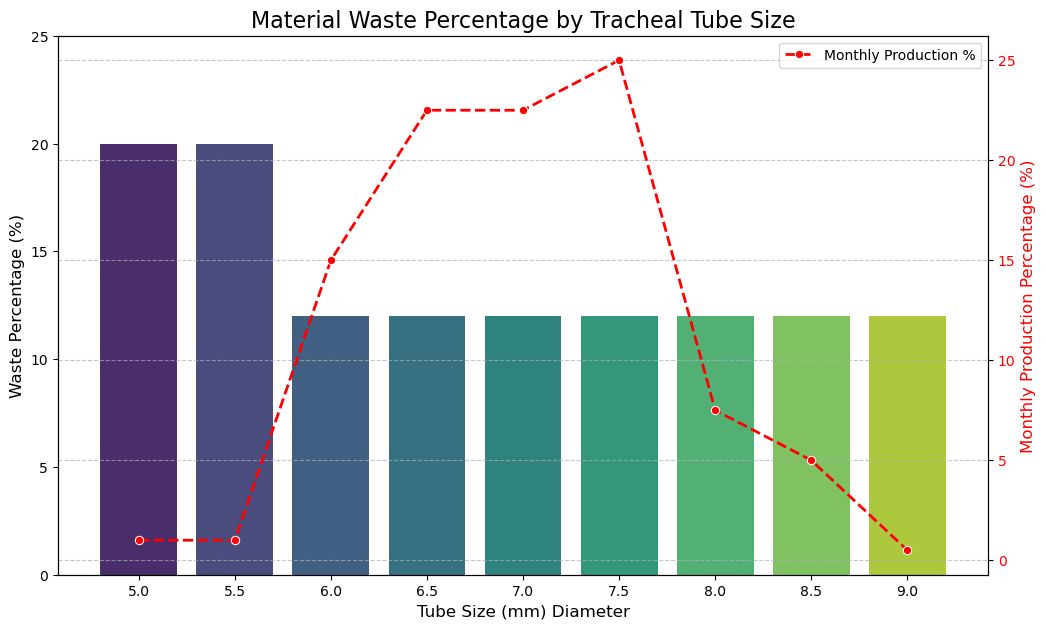

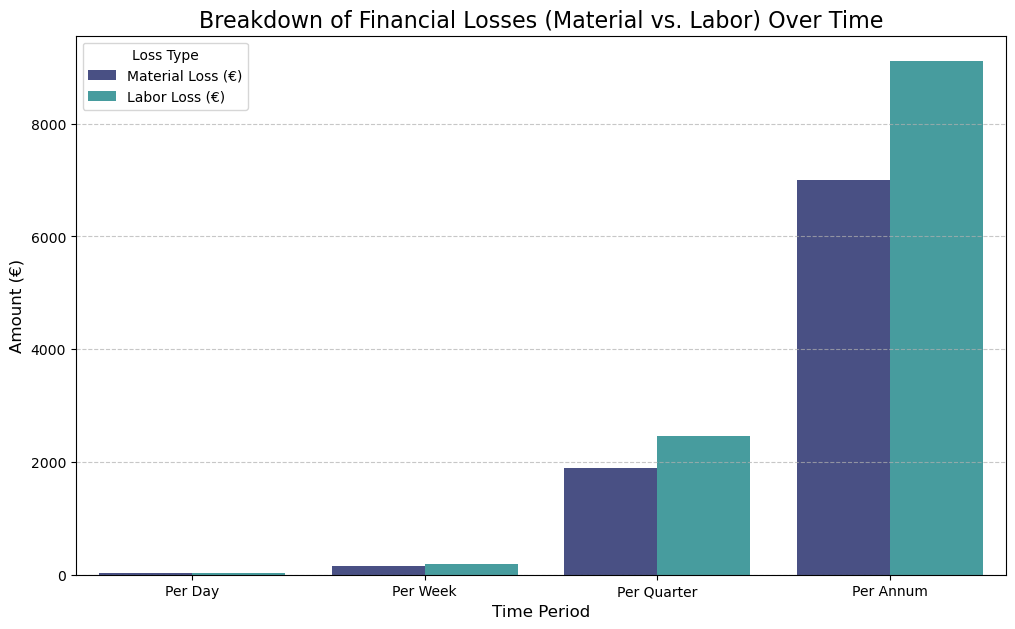

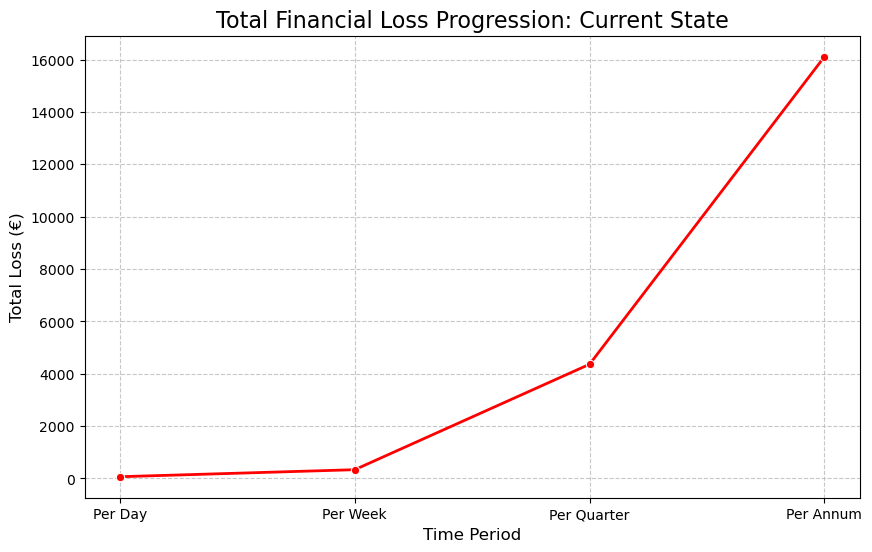


--- Potential Gains from Waste Reduction Scenarios ---
   Reduction (%)  Material Gain (€)  Labor Gain (€)  Total Gain (€)
0             25            1751.04         2276.35         4027.39
1             50            3502.08         4552.70         8054.78
2             75            5253.12         6829.06        12082.18


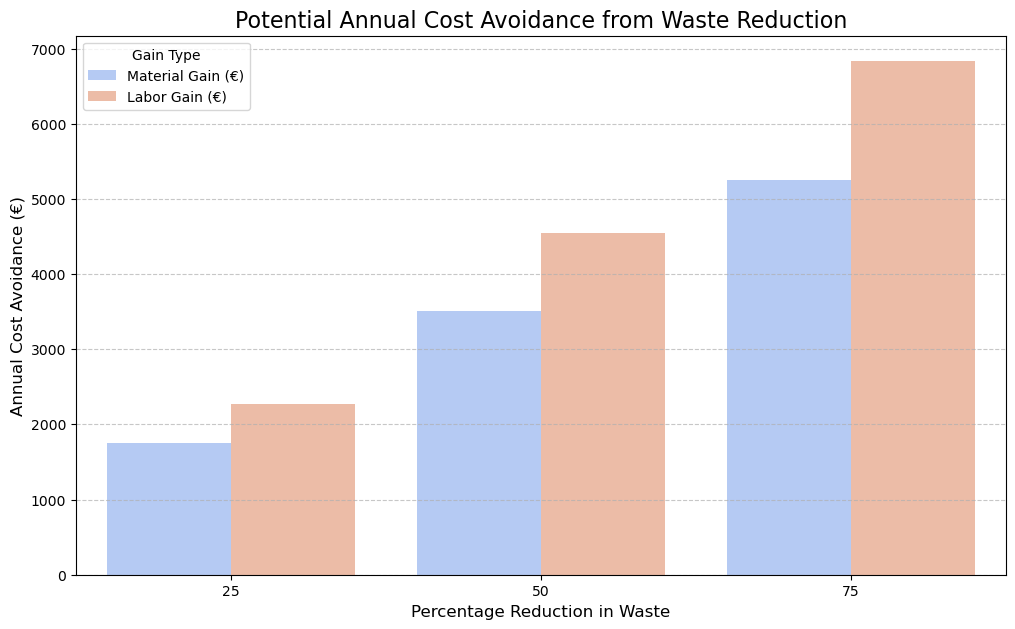

C:\Users\willi\AppData\Local\Temp\ipykernel_11352\3076574784.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='Annual Loss (€)', data=df_annual_comparison, palette='magma')


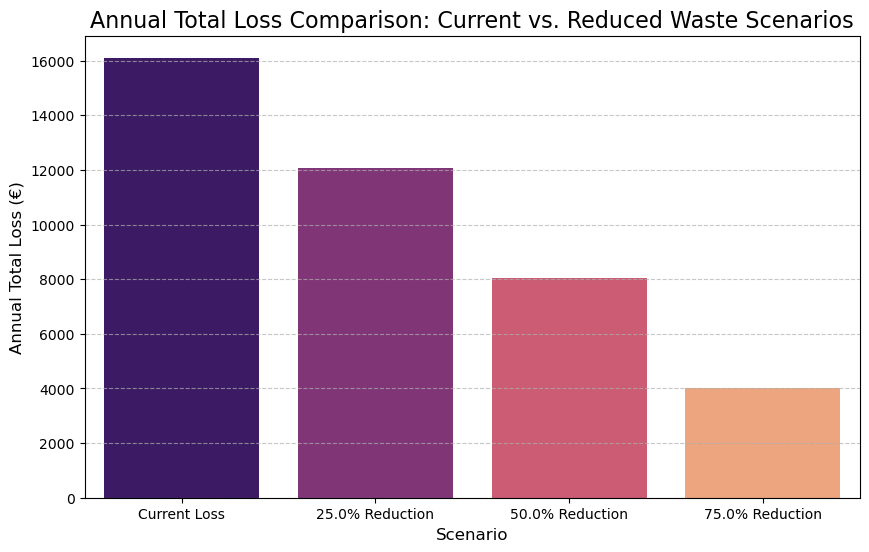

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Data Definition ---
tube_data_sku = {
    'Tube Size (mm)': [5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9],
    'Waste Percentage': [20, 20, 12, 12, 12, 12, 12, 12, 12],
    'Monthly Production Percentage': [1, 1, 15, 22.5, 22.5, 25, 7.5, 5, 0.5]
}
df_sku = pd.DataFrame(tube_data_sku)

# --- Calculation Parameters ---
daily_production_tubes = 4800 # Updated
operator_tubes_per_shift = 1600 # Updated
operator_shift_hours = 8
labor_cost_per_hour = 13.00 # Euro

# Fixed working days for consistency
monthly_working_days = 20
annual_working_days = monthly_working_days * 12

cost_per_uncut_tube = 0.05 # Euro

# --- Derived Parameters ---
# Weighted Average Waste Percentage
df_sku['Weighted_Waste'] = df_sku['Waste Percentage'] * df_sku['Monthly Production Percentage']
weighted_avg_waste_percentage = df_sku['Weighted_Waste'].sum() / df_sku['Monthly Production Percentage'].sum()

# Cost per Wasted Tube (Labor Component)
tubes_processed_per_hour = operator_tubes_per_shift / operator_shift_hours
labor_cost_per_wasted_tube = labor_cost_per_hour / tubes_processed_per_hour

# --- Losses Calculation ---
# Per Daily Output (4800 tubes/day)
tubes_wasted_per_daily_output = daily_production_tubes * (weighted_avg_waste_percentage / 100)
material_loss_per_daily_output = tubes_wasted_per_daily_output * cost_per_uncut_tube
labor_loss_per_daily_output = tubes_wasted_per_daily_output * labor_cost_per_wasted_tube
total_loss_per_daily_output = material_loss_per_daily_output + labor_loss_per_daily_output

# Per Week (5 working days)
total_loss_per_week = total_loss_per_daily_output * 5
material_loss_per_week = material_loss_per_daily_output * 5
labor_loss_per_week = labor_loss_per_daily_output * 5

# Per Quarter (13 weeks)
total_loss_per_quarter = total_loss_per_week * 13
material_loss_per_quarter = material_loss_per_week * 13
labor_loss_per_quarter = labor_loss_per_week * 13

# Per Annum (240 working days)
total_loss_per_annum = total_loss_per_daily_output * annual_working_days
material_loss_per_annum = material_loss_per_daily_output * annual_working_days
labor_loss_per_annum = labor_loss_per_daily_output * annual_working_days


# --- Prepare Data for Visualizations ---
loss_data = {
    'Period': ['Per Day', 'Per Week', 'Per Quarter', 'Per Annum'],
    'Material Loss (€)': [material_loss_per_daily_output, material_loss_per_week, material_loss_per_quarter, material_loss_per_annum],
    'Labor Loss (€)': [labor_loss_per_daily_output, labor_loss_per_week, labor_loss_per_quarter, labor_loss_per_annum],
    'Total Loss (€)': [total_loss_per_daily_output, total_loss_per_week, total_loss_per_quarter, total_loss_per_annum]
}
df_losses = pd.DataFrame(loss_data)

# Print calculated losses for clarity
print("--- Current Loss Calculations ---")
print(f"Weighted Average Waste Percentage: {weighted_avg_waste_percentage:.2f}%")
print(f"Tubes Wasted Per Daily Output: {tubes_wasted_per_daily_output:.2f} tubes")
print(f"Material Loss Per Daily Output: €{material_loss_per_daily_output:.2f}")
print(f"Labor Loss Per Daily Output: €{labor_loss_per_daily_output:.2f}")
print(f"Total Loss Per Daily Output: €{total_loss_per_daily_output:.2f}\n")

print(f"Total Loss Per Week: €{total_loss_per_week:.2f}\n")
print(f"Total Loss Per Quarter: €{total_loss_per_quarter:.2f}\n")
print(f"Total Loss Per Annum: €{total_loss_per_annum:.2f}\n")


# --- Visualization 1: Waste Percentage by Tube Size (with Production Mix) ---
plt.figure(figsize=(12, 7))
sns.barplot(x='Tube Size (mm)', y='Waste Percentage', data=df_sku, palette='viridis')
plt.title('Material Waste Percentage by Tracheal Tube Size', fontsize=16)
plt.xlabel('Tube Size (mm) Diameter', fontsize=12)
plt.ylabel('Waste Percentage (%)', fontsize=12)
plt.ylim(0, 25)
# Overlay production percentage for context
ax2 = plt.twinx()
ax2 = sns.lineplot(x=df_sku['Tube Size (mm)'].astype(str), y='Monthly Production Percentage', data=df_sku,
                   marker='o', color='red', linestyle='--', linewidth=2, label='Monthly Production %')
ax2.set_ylabel('Monthly Production Percentage (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

# --- Visualization 2: Total Losses (Material vs. Labor) Over Time ---
df_losses_melted = df_losses.melt(id_vars='Period', value_vars=['Material Loss (€)', 'Labor Loss (€)'],
                                  var_name='Loss Type', value_name='Amount (€)')

plt.figure(figsize=(12, 7))
sns.barplot(x='Period', y='Amount (€)', hue='Loss Type', data=df_losses_melted, palette='mako')
plt.title('Breakdown of Financial Losses (Material vs. Labor) Over Time', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Amount (€)', fontsize=12)
# plt.yscale('log') # Removed log scale as magnitudes are closer now
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Visualization 3: Total Financial Loss Progression ---
plt.figure(figsize=(10, 6))
sns.lineplot(x='Period', y='Total Loss (€)', data=df_losses, marker='o', color='red', linewidth=2)
plt.title('Total Financial Loss Progression: Current State', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Total Loss (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# --- Gains from Decreased Loss Scenarios ---
decrease_scenarios = [0.25, 0.50, 0.75] # 25%, 50%, 75% reduction
gains_data = []

for reduction_factor in decrease_scenarios:
    new_waste_percentage = weighted_avg_waste_percentage * (1 - reduction_factor)
    
    # Calculate new annual losses based on new waste percentage
    new_tubes_wasted_per_annum = (daily_production_tubes * annual_working_days) * (new_waste_percentage / 100)
    new_material_loss_per_annum = new_tubes_wasted_per_annum * cost_per_uncut_tube
    new_labor_loss_per_annum = new_tubes_wasted_per_annum * labor_cost_per_wasted_tube
    new_total_loss_per_annum = new_material_loss_per_annum + new_labor_loss_per_annum
    
    # Calculate gains
    material_gain = material_loss_per_annum - new_material_loss_per_annum
    labor_gain = labor_loss_per_annum - new_labor_loss_per_annum
    total_gain = total_loss_per_annum - new_total_loss_per_annum
    
    gains_data.append({
        'Reduction (%)': int(reduction_factor * 100),
        'Material Gain (€)': material_gain,
        'Labor Gain (€)': labor_gain,
        'Total Gain (€)': total_gain
    })

df_gains = pd.DataFrame(gains_data)

print("\n--- Potential Gains from Waste Reduction Scenarios ---")
print(df_gains.round(2))

# --- Visualization 4: Potential Annual Gains from Waste Reduction ---
df_gains_melted = df_gains.melt(id_vars='Reduction (%)', value_vars=['Material Gain (€)', 'Labor Gain (€)'],
                                var_name='Gain Type', value_name='Amount (€)')

plt.figure(figsize=(12, 7))
sns.barplot(x='Reduction (%)', y='Amount (€)', hue='Gain Type', data=df_gains_melted, palette='coolwarm')
plt.title('Potential Annual Cost Avoidance from Waste Reduction', fontsize=16)
plt.xlabel('Percentage Reduction in Waste', fontsize=12)
plt.ylabel('Annual Cost Avoidance (€)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Visualization 5: Comparison of Current vs. Reduced Annual Total Losses ---
annual_losses_comparison = {
    'Scenario': ['Current Loss'],
    'Annual Loss (€)': [total_loss_per_annum]
}

for _, row in df_gains.iterrows():
    reduction_pct = row['Reduction (%)']
    current_annual_loss_material = material_loss_per_annum
    current_annual_loss_labor = labor_loss_per_annum

    new_annual_loss_material = current_annual_loss_material - row['Material Gain (€)']
    new_annual_loss_labor = current_annual_loss_labor - row['Labor Gain (€)']
    new_annual_total_loss = new_annual_loss_material + new_annual_loss_labor
    
    annual_losses_comparison['Scenario'].append(f'{reduction_pct}% Reduction')
    annual_losses_comparison['Annual Loss (€)'].append(new_annual_total_loss)

df_annual_comparison = pd.DataFrame(annual_losses_comparison)

plt.figure(figsize=(10, 6))
sns.barplot(x='Scenario', y='Annual Loss (€)', data=df_annual_comparison, palette='magma')
plt.title('Annual Total Loss Comparison: Current vs. Reduced Waste Scenarios', fontsize=16)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Annual Total Loss (€)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()